In [2]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import pandas as pd
from torch_geometric.data import Data, DataLoader
from src.utils import *
from src.architectures import *

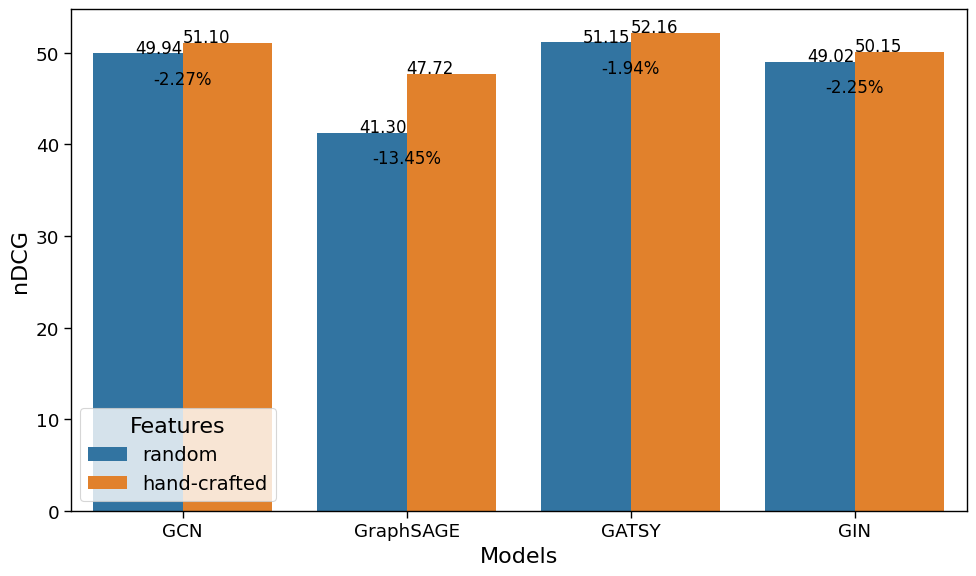

In [17]:
import seaborn as sns

# Data
models = ['GCN', 'GraphSAGE', 'GATSY', 'GIN']
random_performance = [49.94, 41.30, 51.15, 49.02]
low_level_performance = [51.10, 47.72, 52.16, 50.15]

std_random = [0.56, 1.68, 0.56, 0.58]
std_low_level = [0.38, 0.98, 0.55, 0.46]

# Compute percentage decrease
percentage_decrease = [
    ((rand-low) / low) * 100 for rand, low in zip(random_performance, low_level_performance)
]

# Create a DataFrame for seaborn
df = pd.DataFrame({
    'Model': models * 2,
    'Performance': random_performance + low_level_performance,
    'Features': ['random'] * len(models) + ['hand-crafted'] * len(models)
})

# Plotting
plt.figure(figsize=(10, 6))
sns.set_context("paper", font_scale=1.5)
ax = sns.barplot(x='Model', y='Performance', hue='Features', data=df)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models', fontsize=16)
ax.set_ylabel('nDCG', fontsize=16)
# ax.set_title('Performance Decrease from Low-Level to Random', fontsize=18)
ax.legend(title='Features', fontsize=14, title_fontsize='16')

# Annotate bars with percentage decrease
for i in range(len(models)):
    ax.annotate(f'{percentage_decrease[i]:.2f}%',
                xy=(i, random_performance[i]),
                xytext=(0, -25),  # 3 points vertical offset
                textcoords="offset points",
                ha='center', va='bottom', fontsize=12)
    ax.annotate(f'{random_performance[i]:.2f}',
                xy=(i, random_performance[i]),
                xytext=(0, 4),  # Inside the bar
                textcoords="offset points",
                ha='right', va='center', fontsize=12)
    ax.annotate(f'{low_level_performance[i]:.2f}',
                xy=(i, low_level_performance[i]),
                xytext=(0, 4),  # Inside the bar
                textcoords="offset points",
                ha='left', va='center', fontsize=12)

plt.tight_layout()
plt.savefig('full_data_model_comparison.pdf')
plt.show()


In [ ]:

def load_model(model_name, random_feat = False):
    print(f"Let's load {model_name}'s weights...")
    path = './Models/'
    model_data = diz_models[model_name]
    
    path = path + model_data[0]

    if random_feat:
        path += 'True.pt'
    else:
        path += 'False.pt'

    if model_name == 'GAT':
        model = GATSY(n_heads = model_data[1], n_layers = model_data[2])
    elif model_name == 'SAGE':
        model = GraphSage()
    elif model_name == 'GCN':
        model = GCNSY(n_layers=model_data[2])
    elif model_name == 'GIN':
        model = GINSY(n_layers=model_data[2])
    else:
        raise ValueError(f"Model {model_name} not found")

    checkpoint = torch.load(path, map_location=device)
    if isinstance(checkpoint, dict):
        model.load_state_dict(checkpoint)
    else:
        model = checkpoint
    model.to(device)
    return model

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

X = torch.load('data/instance.pt').to(device)      # Instance matrix
A = torch.load('data/adjacencyCOO.pt').to(device)    # Adjacency matrix in the COO format, that is that supported by torch geometric
A1 = torch.load('data/adjacency.pt').to(device)      # Normal adjacency matrix format is obtained with torch.load('adjacency')
num_samples = X.shape[0]
data = Data(x=X, edge_index=A, edge_attr=None, y=None).to(device)

path = './Models/'
diz_models = {
	'GAT': ['GAT_7_3_1_0.001_0.0_triplet_', 1, 3],
	'SAGE': ['SAGE_7_3_0.0001_1e-06_triplet_', 0, 3],
	'GCN': ['GCN_7_3_0.0001_0.0_triplet_', 0, 3],
	'GIN': ['GIN_7_2_0.0001_0.0_triplet_', 0, 2],
}


for mod in diz_models:
    
	print(f"The number of parameters of the {mod} model is {get_n_params(load_model(mod))}")


In [21]:

data = pd.read_csv('dataset_construction/olga_augmented_labels_.csv')
genres_diz = {}
for i in range(len(data)):

    if not pd.isna(data['genres'][i]):
        genres = eval(data['genres'][i])
        for genre in genres:
            if genre not in genres_diz:
                genres_diz[genre] = 1
            else:
                genres_diz[genre] += 1

In [22]:
print(genres_diz)

{'classical': 99, 'classical performance': 14, 'german orchestra': 2, 'orchestra': 35, 'olympia wa indie': 7, 'queercore': 6, 'halloween': 2, 'novelty': 4, 'atmospheric black metal': 4, 'blackgaze': 4, 'french black metal': 2, 'french shoegaze': 2, 'gaian doom': 3, 'post-black metal': 1, 'post-metal': 11, 'classic soul': 40, 'northern soul': 121, 'philly soul': 48, 'southern soul': 32, 'latin alternative': 66, 'world': 8, 'bubblegum dance': 7, 'finnish electronic': 1, 'finnish techno': 1, 'minimal dub': 4, 'oakland indie': 2, 'french hip hop': 13, 'old school rap francais': 10, 'pop urbaine': 7, 'brutal death metal': 19, 'death metal': 135, 'deathgrind': 17, 'groove metal': 85, 'metal': 173, 'polish death metal': 2, 'polish metal': 3, 'technical death metal': 12, 'technical groove metal': 1, 'thrash metal': 82, 'bristol electronic': 4, 'drum and bass': 59, 'jump up': 9, 'jungle': 69, 'bubble trance': 11, 'eurodance': 73, 'german dance': 1, 'hands up': 28, 'pop punk': 98, 'jazz trumpet'